### Trees vs Support Vectors

Both these classification algorithms are powerful. But one might outperform the other based on the nature of the input data. Here are two examples.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### We choose a 1000 random points between (0,1) in two dimensions, and send the labels to be 0 and 1 based on if they are above or below the diagonal line:

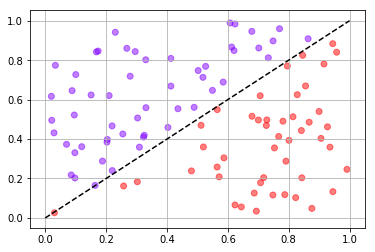

In [3]:
X = np.random.rand(100, 2)
y1 = [1 if i[0]>i[1] else 0 for i in X]

import matplotlib.cm as cm


def visualize(X, y):
    c = cm.rainbow(np.linspace(0, 1, 2))
    plt.scatter([i[0] for i in X], [i[1] for i in X], color=[c[i] for i in y], alpha=.5)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid(True)
    

visualize(X, y1)

#### The data above is diagonally separable. And just a linear SVC can nail that. As we see below.

In [4]:
from sklearn.cross_validation import train_test_split

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

linearsvc = LinearSVC()
# Do the test 10 times with a LinearSVC and get the average score
quick_test_afew_times(linearsvc, X, y1)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.96666666666666656

#### This is a tough problem for Decision Tree. It will easily overfit the data and perform poorly. Random Forest corrects for the overfitting and improves the performance, but never gets as good as the Linear SVC.

In [5]:
decisiontree = DecisionTreeClassifier(max_depth=2)
quick_test_afew_times(decisiontree, X, y1)

0.82333333333333347

In [8]:
randomforest = RandomForestClassifier()
quick_test_afew_times(randomforest, X, y1)

0.92666666666666675

#### Now we will try a different categorization. Put an orthogonal axis in the middle of x values and make two diagonal quadrants the same class.

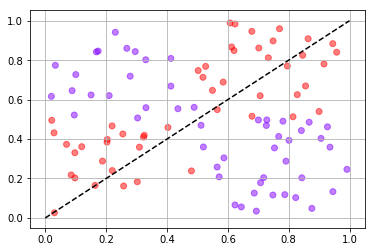

In [10]:
y2 = [1 if (0.5-i[0])*(0.5-i[1])>0 else 0 for i in X]
visualize(X, y2)

#### Decision tree thrives on this data:

In [11]:
decisiontree = DecisionTreeClassifier()
quick_test_afew_times(decisiontree, X, y2)

0.88333333333333341

#### Linear SVC struggles, since the data isn't linearly seperable:

In [12]:
linearsvc = LinearSVC()
quick_test_afew_times(linearsvc, X, y2)

0.56666666666666665

#### Using a polynomal kernel can do better:

In [13]:
svc = SVC()
quick_test_afew_times(svc, X, y2)

0.69666666666666666

#### But something to keep in mind. SVC, especially non-linear ones perform best when the data is scaled between -1 and 1. Performance improves once we do that. But still not the perfect score of the Decision Tree.

In [11]:
s2 = SVC()
X2 = (0.5-X) * 2
quick_test_afew_times(s2, X2, y2)

0.87666666666666659

#### We looked at two simple problems. Linear SVC and Decision Tree solved a different one perfectly and struggled with the other. When they struggled, sophistications like non-linear kernels and Random Forests helped, but still couldn't reach perfections.

#### It's easy to throw your data into a whole bunch of algorithms and see which one does best. But gaining some intuition for your data and your models, is worth the time and effort.